In [3]:
!pip install paddlepaddle

In [4]:
!pip install paddleocr

In [5]:
!wget https://thumbs.dreamstime.com/b/images-letters-latin-alphabet-which-made-colored-plasticine-135590599.jpg -O "1.jpg"

--2023-08-20 11:58:59--  https://thumbs.dreamstime.com/b/images-letters-latin-alphabet-which-made-colored-plasticine-135590599.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.153.91
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.153.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67904 (66K) [image/jpeg]
Saving to: ‘1.jpg’

1.jpg               100%[===================>]  66.31K  --.-KB/s    in 0.002s  

2023-08-20 11:58:59 (33.6 MB/s) - ‘1.jpg’ saved [67904/67904]



In [5]:
from paddleocr import PaddleOCR

In [6]:
ocr=PaddleOCR(lang="en")

[2023/08/20 12:12:39] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/jovyan/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/jovyan/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

In [34]:
import paddleocr,paddle
print(f" paddleocr version  {paddleocr.__version__ }    paddlepaddle version  {paddle.__version__ }")

 paddleocr version  2.7.0.2    paddlepaddle version  2.5.1


In [7]:
result=ocr.ocr("1.jpg")

[2023/08/20 12:12:56] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/08/20 12:12:58] ppocr DEBUG: dt_boxes num : 6, elapse : 1.9741647243499756
[2023/08/20 12:13:00] ppocr DEBUG: rec_res num  : 6, elapse : 1.8038604259490967


In [8]:
result

[[[[[154.0, 74.0], [546.0, 74.0], [546.0, 159.0], [154.0, 159.0]],
   ('ABCD', 0.991276741027832)],
  [[[134.0, 207.0], [568.0, 207.0], [568.0, 290.0], [134.0, 290.0]],
   ('EFGHI', 0.9679659008979797)],
  [[[106.0, 342.0], [591.0, 342.0], [591.0, 421.0], [106.0, 421.0]],
   ('JKLMN', 0.986057460308075)],
  [[[62.0, 468.0], [638.0, 470.0], [638.0, 568.0], [61.0, 565.0]],
   ('OPQRST', 0.9105215668678284)],
  [[[194.0, 607.0], [521.0, 607.0], [521.0, 691.0], [194.0, 691.0]],
   ('U V W', 0.8579586148262024)],
  [[[217.0, 742.0], [499.0, 738.0], [500.0, 817.0], [218.0, 821.0]],
   ('X Y Z', 0.8750767707824707)]]]

In [9]:
import cv2

In [10]:
result[0][1][1]

('EFGHI', 0.9679659008979797)

In [28]:
imarr=cv2.imread("1.jpg")
for res in result[0]:
    p1,p2=tuple([int(i) for i in res[0][0]]),tuple([int(i) for i in res[0][2]])
    text=res[1][0]
    cv2.rectangle(imarr,p1,p2,(255,0,0),2)
    cv2.putText(imarr,text,p1,cv2.FONT_HERSHEY_DUPLEX,1.5,(0,0,0),2)

In [29]:
import matplotlib.pyplot as plt

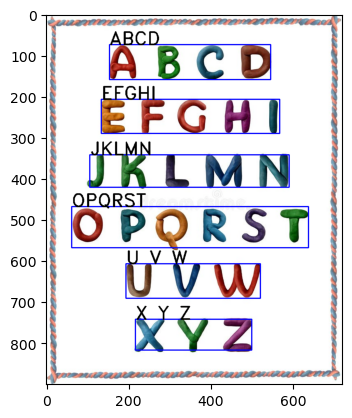

In [30]:
plt.imshow(cv2.cvtColor(imarr,cv2.COLOR_BGR2RGB))